# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

Iniciaremos cargando las librerías de pandas y matplotlib.pyplot, las cuales serán de utilidad para el procesamiento y visualización de los datos.

In [113]:
# Cargar todas las librerías
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


### Cargar datos

Ahora procederemos a cargar los datos provistos para el análisis a realizar.

In [114]:
# Carga el archivo de datos en un DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Ahora procederemos a darnos una idea general sobre la información provista.

In [115]:
# imprime la información general/resumida sobre el DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [116]:
# imprimir una muestra de datos

data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


En un inicio observamos que existen 5 columnas con datos incompletos, principalmente sobre la tracción del carro, que podría estar directamente relacionada con la naturaleza booleana de la variable. La infromación faltante referente a los cilindros puede relacionarse con el año, el modelo y la transmisión del auto. Las otras columnas faltantes son el año del modelo, el kilometraje y el color. Es posible que al menos algunos de estos datos no hubieran estado disponibles para llenado antes de cierta fecha, lo que habrá que corroborar.

Por otro lado, la tracción (booleana), los cilindros, el kilometraje y el año del modelo pueden convertirse en una variable int, ya que estos son enteros, y la fecha de posteo a un objeto tipo date-time, para procesarlos más facilmente.

In [117]:
#Observar duplicidad

data.duplicated().sum()

0

In [118]:
#Buscar valores únicos de variables de cadena y booleana para confirmar que no exite una mala captura de la información.

print(sorted(data['model'].unique()))
print()
print(sorted(data['condition'].unique()))
print()
print(sorted(data['fuel'].unique()))
print()
print(sorted(data['transmission'].unique()))
print()
print(sorted(data['type'].unique()))
print()
print(data['paint_color'].unique())
print()
print(data['is_4wd'].unique())

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford 

### Conclusiones y siguientes pasos

Los problemas principales de la información provista parecen recaer en ausencia de datos y errores en el tipo de dato de las columnas, fuera de esto, no hay evidencia inmediata de errores en la captura, duplicidad o libertad de captura de cadenas de texto que hicieran posible una mala categorización. Igualmente podemos observar que el booleano está capturado como 1 el true, pero el 0, flaso, ha quedado como Nan, esto simplemente hay que modificarlo.

Para solucionar estos problemas se buscará la mejor forma de tratar los valores ausentes, se cambiarán de tipo de datos las columnas que lo requieran, se corregirá el booleano; y para un mejor manejo del estado del carro se implementará una escala numérica que corresponda la escala descriptiva manejada en la base.

## Tratar los valores ausentes

Comencemos observando la cantidad y porcentaje de valores ausentes en las columnas.

In [119]:
percent_nan = data.isnull().sum() * 100 / len(data)
count_nan = data.isnull().sum()
nsn_value_df = pd.DataFrame({'column_name': data.columns,
                                 'count_nan': count_nan,
                                 'percent_nan': percent_nan})
print(nsn_value_df)

               column_name  count_nan  percent_nan
price                price          0     0.000000
model_year      model_year       3619     7.023775
model                model          0     0.000000
condition        condition          0     0.000000
cylinders        cylinders       5260    10.208637
fuel                  fuel          0     0.000000
odometer          odometer       7892    15.316836
transmission  transmission          0     0.000000
type                  type          0     0.000000
paint_color    paint_color       9267    17.985444
is_4wd              is_4wd      25953    50.369723
date_posted    date_posted          0     0.000000
days_listed    days_listed          0     0.000000


Podemos observar que son 5 columnas en las cuales faltan valores, y destaca principalmente la que debería ser booleana, is_4wd. Observamos que donde debería ir el 0 ha quedado como Nan. Y comprobaremos que ya no queden datos ausentes con un cabecero y un conteo.

In [120]:
data['is_4wd'] = data['is_4wd'].fillna(0)

print(data.head(15))
print()
data['is_4wd'].isna().sum()

    price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
1   25500         NaN                ford f-150       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent      

0

A continuación, para la obtención de los cilindros vamos a clasificarlos por modelo, año y tipo de transmisión, obtendremos el número de cilindros mediano para cada una de estas clasificaciones y llenaremos los vacios correspondientes. Aquí se eligió el medio, ya que comunmente no hay más de dos números de cilindros por agrupación, y de el que haya mayoría terminará ocupado la posición mediana.

In [121]:
cualidades_moda = data.dropna(subset=['model_year','cylinders']).groupby(['model','model_year','transmission']).agg({'cylinders':'median'})
print(cualidades_moda)


                                           cylinders
model             model_year transmission           
acura tl          1999.0     automatic           6.0
                  2001.0     automatic           6.0
                  2002.0     automatic           6.0
                  2003.0     automatic           6.0
                  2004.0     automatic           6.0
...                                              ...
volkswagen passat 2014.0     automatic           4.0
                  2015.0     automatic           4.0
                  2016.0     automatic           4.0
                  2017.0     automatic           4.0
                  2018.0     automatic           4.0

[3111 rows x 1 columns]


Ahora crearemos una función para la sustitución y probémosla:

In [122]:
def modify_cylinders(row):
    year2 = row['model_year']
    model2 = row['model']
    transmission2 = row['transmission']
    if pd.isna(row['cylinders']):
        try:
            substitute = cualidades_moda.loc[(cualidades_moda.index.get_level_values('model_year')==year2)&(cualidades_moda.index.get_level_values('model')==model2)&(cualidades_moda.index.get_level_values('transmission')==transmission2)]['cylinders'].sum()
        except:
            substitute = float('nan')
        return substitute
    else:
        return row['cylinders']
    
test_table_data={'model_year':[1999,2014,2015],'model':['acura tl','volkswagen passat','volkswagen passat'],'transmission':['automatic','automatic','automatic'],'cylinders':[float('nan'),float('nan'),34]}
test_table = pd.DataFrame(test_table_data)

test_table['cylinders']=test_table.apply(modify_cylinders,axis=1)

print(test_table)

   model_year              model transmission  cylinders
0        1999           acura tl    automatic        6.0
1        2014  volkswagen passat    automatic        4.0
2        2015  volkswagen passat    automatic       34.0


Confirmamos que la función funciona y procedemos a sustituir los valores y comprobar ausentes que permanecen:

In [123]:
data['cylinders']=data.apply(modify_cylinders,axis=1)

print(data['cylinders'].isna().sum())

data.head(30)

0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Confirmamos que ya no existen valores vacíos para los cilindros, pero entre los valores obtenidos llegamos a obtener algunos con valores medios, lo cual es ilógico ya que los cilindros son enteros. Para solucionar esta situación y considerando que esta situación debió darse justo en situaciones donde la media quedó entre dos valores distintos podemos considerar aún prudente redondear los valores hacia abajo cambiando la columna a tipo int.

In [124]:
data['cylinders']=data['cylinders'].astype('int64')

Para el año del modelo realizaremos un proceso distinto, donde consideraremos el modelo, el estado del auto, la fecha de publicación y el precio como valores a considerar en una mediana. Para esto será necesario cambiar el tipo de de date_posted a un objeto datetime y crear para los precios una columna con rangos.

Comencemos por estas adaptaciones.

In [125]:
data['date_posted']=pd.to_datetime(data['date_posted'],format='%Y-%m-%d')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [126]:
def price_group(row):
    if pd.isna(row['price']):
        return 'unknown'
    else:
        precio = row['price']
        rango_bajo = int(precio/500)*500
        rango_alto = int(precio/500)*500
        rango_alto += 500
        return '{} - {}'.format(rango_bajo, rango_alto)
    
test_table2_data = {'price':[525,10523],'otravar':['x','j']}
test_table2 = pd.DataFrame(test_table2_data)

test_table2['group_price']=test_table2.apply(price_group,axis=1)

print(test_table2)


   price otravar    group_price
0    525       x     500 - 1000
1  10523       j  10500 - 11000


In [127]:
data['group_price']=data.apply(price_group,axis=1)
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,9000 - 9500
1,25500,NaN,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,25500 - 26000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,5500 - 6000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,1500 - 2000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,14500 - 15000
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,14500 - 15000
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,12500 - 13000
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,15500 - 16000
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,11500 - 12000
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9000 - 9500


Ahora crearemos una fórmula que considre las variables mencionadas (precio, estado, modelo y año de publicación) para estimar el año del modelo en los valores ausentes:

In [128]:
data_dropna = data.dropna(subset=['model_year'])

def year_ausente(row):
    if pd.isna(row['model_year']):
        try:
            modelo2 = row['model']
            grupo_precio2 = row['group_price']
            condition2 = row['condition']
            year_publi2 = row['date_posted'].year
            det = int(data_dropna.loc[(data_dropna['model']==modelo2)&(data_dropna['group_price']==grupo_precio2)&(data_dropna['condition']==condition2)&(pd.to_datetime(data_dropna['date_posted']).dt.year==year_publi2)]['model_year'].median())
        except:
            det = float('nan')
        return det
    else:
        return row['model_year']

test_table3_data = {'model_year':[2005,float('nan'),float('nan')],'model':['ford f-150','chrysler 200','ford f-150'],'group_price':['5500 - 6000','14500 - 15000','25500 - 26000'],'condition':['excellent','good','good'],'date_posted':[data.iloc[2]['date_posted'],data.iloc[4]['date_posted'],data.iloc[1]['date_posted']]}
test_table3 = pd.DataFrame(test_table3_data)

test_table3['model_year']=test_table3.apply(year_ausente,axis=1)

print(test_table3)

   model_year         model    group_price  condition date_posted
0      2005.0    ford f-150    5500 - 6000  excellent  2019-02-07
1         NaN  chrysler 200  14500 - 15000       good  2019-04-02
2      2014.0    ford f-150  25500 - 26000       good  2018-10-19


In [129]:
data['model_year']=data.apply(year_ausente,axis=1)

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,9000 - 9500
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,25500 - 26000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,5500 - 6000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,1500 - 2000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,14500 - 15000
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,14500 - 15000
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,12500 - 13000
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,15500 - 16000
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,11500 - 12000
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9000 - 9500


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51014 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  group_price   51525 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 5.5+ MB


El modelo de alrrededor de 3000 carros pudo estimarse con este método, lo aplicaremos nuevamente, pero con un rango más holgado de precios esperando encontrar una mejora significativa. El porcentaje de los ausentes actualmente ya es menos del 1%, por lo que aquellos que ya no sean solucionados con esta ronda serán eliminados al poderse considerar ya despreciables.

In [131]:
def price_group2(row):
    if pd.isna(row['price']):
        return 'unknown'
    else:
        precio = row['price']
        rango_bajo = int(precio/1000)*1000
        rango_alto = int(precio/1000)*1000
        rango_alto += 1000
        return '{} - {}'.format(rango_bajo, rango_alto)

In [132]:
data['group_price2']=data.apply(price_group2,axis=1)
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,9000 - 9500,9000 - 10000
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,25500 - 26000,25000 - 26000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,5500 - 6000,5000 - 6000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,1500 - 2000,1000 - 2000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,14500 - 15000,14000 - 15000
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,14500 - 15000,14000 - 15000
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,12500 - 13000,12000 - 13000
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,15500 - 16000,15000 - 16000
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,11500 - 12000,11000 - 12000
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9000 - 9500,9000 - 10000


In [133]:
data_dropna2 = data.dropna(subset=['model_year'])

def year_ausente2(row):
    if pd.isna(row['model_year']):
        try:
            modelo2 = row['model']
            grupo_precio2 = row['group_price2']
            condition2 = row['condition']
            year_publi2 = row['date_posted'].year
            det = int(data_dropna2.loc[(data_dropna2['model']==modelo2)&(data_dropna2['group_price2']==grupo_precio2)&(data_dropna2['condition']==condition2)&(pd.to_datetime(data_dropna2['date_posted']).dt.year==year_publi2)]['model_year'].median())
        except:
            det = float('nan')
        return det
    else:
        return row['model_year']

In [134]:
data['model_year']=data.apply(year_ausente2,axis=1)

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,9000 - 9500,9000 - 10000
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,25500 - 26000,25000 - 26000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,5500 - 6000,5000 - 6000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,1500 - 2000,1000 - 2000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,14500 - 15000,14000 - 15000
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,14500 - 15000,14000 - 15000
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,12500 - 13000,12000 - 13000
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,15500 - 16000,15000 - 16000
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,11500 - 12000,11000 - 12000
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9000 - 9500,9000 - 10000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51230 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  group_price   51525 non-null  object        
 14  group_price2  51525 non-null  object        
dtypes: datetime64[ns](1), float64(3), in

In [136]:
data=data.dropna(subset=['model_year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51230 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51230 non-null  int64         
 1   model_year    51230 non-null  float64       
 2   model         51230 non-null  object        
 3   condition     51230 non-null  object        
 4   cylinders     51230 non-null  int64         
 5   fuel          51230 non-null  object        
 6   odometer      43379 non-null  float64       
 7   transmission  51230 non-null  object        
 8   type          51230 non-null  object        
 9   paint_color   42024 non-null  object        
 10  is_4wd        51230 non-null  float64       
 11  date_posted   51230 non-null  datetime64[ns]
 12  days_listed   51230 non-null  int64         
 13  group_price   51230 non-null  object        
 14  group_price2  51230 non-null  object        
dtypes: datetime64[ns](1), float64(3), in

Se terminaron descartando 294 registros, que quivalen al 0.57% de los datos, lo cual no afectará drásticamente los resultados. Es importante destacar que dentro de estos registros eliminados, los cuales parecían no coincidir con registros comunes, un gran porcentaje además tenía falta de información en las dos variables pendientes con valores ausentes. 254 (86.4%) de los registros eliminados tampoco contaban con información del odómetro y 234 (79.6%) con información del color. Lo cual nos confirma lo extraño de los registros eliminados.

Los valores ausentes de paint_color se mantendrán desconocidos, pero para cumplir con un formato de cadena, serán transformados de ausente a 'unknown'.

In [137]:
data.loc[pd.isna(data['paint_color']),'paint_color']='unknown'
data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,9000 - 9500,9000 - 10000
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,25500 - 26000,25000 - 26000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,5500 - 6000,5000 - 6000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,1500 - 2000,1000 - 2000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,14500 - 15000,14000 - 15000
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,14500 - 15000,14000 - 15000
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,12500 - 13000,12000 - 13000
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,15500 - 16000,15000 - 16000
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,11500 - 12000,11000 - 12000
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9000 - 9500,9000 - 10000


Finalmente abordaremos la columna 'odometer' considerando un gasto similar en el tiempo, para lo que ocuparemos la mediana de la información por grupos dividida por 'condition' y 'model_year'.

In [138]:
data_for_odometer = data.dropna(subset=['odometer'])

def millaje_ausente(row):
    if pd.isna(row['odometer']):
        try:
            model_year2 = row['model_year']
            condition2 = row['condition']
            det = int(data_for_odometer.loc[(data_for_odometer['model_year']==model_year2)&(data_for_odometer['condition']==condition2)]['odometer'].median())
        except:
            det = float('nan')
        return det
    else:
        return row['odometer']
    
    
data['odometer']=data.apply(millaje_ausente,axis=1)
    
data.info()    
print(data.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51230 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51230 non-null  int64         
 1   model_year    51230 non-null  float64       
 2   model         51230 non-null  object        
 3   condition     51230 non-null  object        
 4   cylinders     51230 non-null  int64         
 5   fuel          51230 non-null  object        
 6   odometer      51223 non-null  float64       
 7   transmission  51230 non-null  object        
 8   type          51230 non-null  object        
 9   paint_color   51230 non-null  object        
 10  is_4wd        51230 non-null  float64       
 11  date_posted   51230 non-null  datetime64[ns]
 12  days_listed   51230 non-null  int64         
 13  group_price   51230 non-null  object        
 14  group_price2  51230 non-null  object        
dtypes: datetime64[ns](1), float64(3), in

Como podemos observar, sólo quedan 7 registros con valores ausentes, que evidentemente representan excepciones y dado su poco impacto en los datos procederemos a eliminarlos.

In [139]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51223 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51223 non-null  int64         
 1   model_year    51223 non-null  float64       
 2   model         51223 non-null  object        
 3   condition     51223 non-null  object        
 4   cylinders     51223 non-null  int64         
 5   fuel          51223 non-null  object        
 6   odometer      51223 non-null  float64       
 7   transmission  51223 non-null  object        
 8   type          51223 non-null  object        
 9   paint_color   51223 non-null  object        
 10  is_4wd        51223 non-null  float64       
 11  date_posted   51223 non-null  datetime64[ns]
 12  days_listed   51223 non-null  int64         
 13  group_price   51223 non-null  object        
 14  group_price2  51223 non-null  object        
dtypes: datetime64[ns](1), float64(3), in

Observamos que efectivamente ya no se encuentran valores ausentes y procederemos con la corrección de tipos de datos.

## Corregir los tipos de datos

Como se mencionó anteriormente existen varias columnas que se verán beneficiadas por el cambio en el tipo de datos. La columna con la fecha de publicación ya fue modificada durante el proceso del tratamiento de datos ausentes, así como la correspondiente a los cilindros, pero quedan pendientes aquellas que se beneficiarían de cambiarse a int o bool, ya que sus valores son enteros (año y millaje) o booleanos (is_4wd).

In [140]:
data['model_year']=data['model_year'].astype('int64')
data['odometer']=data['odometer'].astype('int64')
data['is_4wd']=data['is_4wd'].astype('bool')
data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000
3,1500,2003,ford f-150,fair,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,14500 - 15000,14000 - 15000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,12500 - 13000,12000 - 13000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,15500 - 16000,15000 - 16000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,11500 - 12000,11000 - 12000
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,9000 - 9500,9000 - 10000


## Enriquecer datos

A continuación, para un mejor manejo de los datos se crearán nuevas columnas con valores de día, mes y año de publicación, los años del vehículo al momento de la publicación, el millaje promedio por año y una categorización numérica de la condición del carro.

In [141]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data['year_publication']=data['date_posted'].dt.year
data['month_publication']=data['date_posted'].dt.month
data['day_publication']=data['date_posted'].dt.day
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2,year_publication,month_publication,day_publication
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000,2018,6,23
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000,2018,10,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000,2019,2,7
3,1500,2003,ford f-150,fair,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000,2019,3,22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000,2019,4,2


In [142]:
# Agrega los años del vehículo cuando el anuncio se colocó

def years_when_published(row):
    mod = row['model_year']
    pub = row['year_publication']
    age = pub-mod
    return age

data['age_publication']=data.apply(years_when_published,axis=1)+1
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2,year_publication,month_publication,day_publication,age_publication
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000,2018,6,23,8
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000,2018,10,19,5
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000,2019,2,7,7
3,1500,2003,ford f-150,fair,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000,2019,3,22,17
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000,2019,4,2,3


Para este cálculo se obtendrán los valores de los vehículos que tienen la información del millaje, y para terminar de completar la información de esta columna se utilizará esta mediana considerando la edad del vehículo y el estado del carro y su modelo; que serían las variables que más nos indicarían sobre el uso del automovil. Teniendo ya el promedio, obtendremos el millaje estimado de los valores ausentes.

In [143]:
# Agrega el millaje promedio del vehículo por año

data['odometer_mean'] =  data['odometer'] / data['age_publication'] 

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2,year_publication,month_publication,day_publication,age_publication,odometer_mean
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000,2018,6,23,8,18125.000000
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000,2018,10,19,5,17741.000000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000,2019,2,7,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000,2019,3,22,17,11117.647059
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000,2019,4,2,3,26967.666667


Finalmente agregaremos la escala numérica para la clasificación de la condición del auto y modificamos el tipo de columna a 'int'.

In [144]:
# Se sustituirán los valores de condición con algo que se pueda manipular más fácilmente

def clasif_cindition(row):
    cond = row['condition']
    if cond == 'new':
        return 5
    if cond == 'like new':
        return 4
    if cond == 'excellent':
        return 3
    if cond == 'good':
        return 2
    if cond == 'fair':
        return 1
    if cond == 'salvage':
        return 0
    
data['condition']=data.apply(clasif_cindition,axis=1)
data['condition']=data['condition'].astype('int64')

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2,year_publication,month_publication,day_publication,age_publication,odometer_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000,2018,6,23,8,18125.000000
1,25500,2014,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000,2018,10,19,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000,2019,2,7,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000,2019,3,22,17,11117.647059
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000,2019,4,2,3,26967.666667


## Comprobar datos limpios

Ya con los datos limpios, los observaremos una última vez para confirmar con qué se estará trabajando.

In [145]:
# Información general/resumida sobre el DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51223 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51223 non-null  int64         
 1   model_year         51223 non-null  int64         
 2   model              51223 non-null  object        
 3   condition          51223 non-null  int64         
 4   cylinders          51223 non-null  int64         
 5   fuel               51223 non-null  object        
 6   odometer           51223 non-null  int64         
 7   transmission       51223 non-null  object        
 8   type               51223 non-null  object        
 9   paint_color        51223 non-null  object        
 10  is_4wd             51223 non-null  bool          
 11  date_posted        51223 non-null  datetime64[ns]
 12  days_listed        51223 non-null  int64         
 13  group_price        51223 non-null  object        
 14  group_

In [146]:
# Muestra de datos

data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2,year_publication,month_publication,day_publication,age_publication,odometer_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000,2018,6,23,8,18125.000000
1,25500,2014,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000,2018,10,19,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000,2019,2,7,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000,2019,3,22,17,11117.647059
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000,2019,4,2,3,26967.666667
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,14500 - 15000,14000 - 15000,2018,6,20,5,11590.800000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,12500 - 13000,12000 - 13000,2018,12,27,4,19803.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,15500 - 16000,15000 - 16000,2019,1,7,7,15639.000000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,11500 - 12000,11000 - 12000,2018,7,16,7,14882.000000
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,9000 - 9500,9000 - 10000,2019,2,15,12,12265.916667


## Estudiar parámetros principales

A continuación para darnos una idea de la naturaleza de nuestros datos afectaremos varias columnas con un frupo de acciones que incluyen un histograma, gráfico de caja y bigotes, descripción general y valores límite que indiquen el inicio de valores atipicos. Con esta información podremos limpiar un poco más la información, al darnos cuenta dónde pueden estar los errores.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [147]:
#Generaremos un función que imprima un histograma, un gráfico de caja, la descripción y el límite de los valores atípicos.

def estudio_variable(column):
    data.hist(column)
    plt.figure(figsize=(4,3))
    data.boxplot(column)
    print(data[column].describe())
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lim_sup=Q3+1.5*IQR
    lim_inf=Q1-1.5*IQR
    print()
    print(f'Límite inferior: {lim_inf}, límite superior: {lim_sup}')

count     51223.000000
mean      12099.167815
std        9991.184296
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16777.000000
max      375000.000000
Name: price, dtype: float64

Límite inferior: -12665.5, límite superior: 34442.5


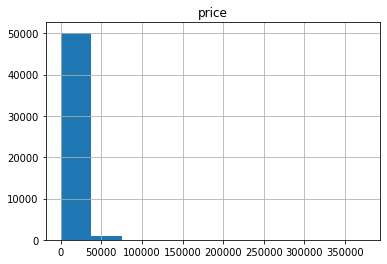

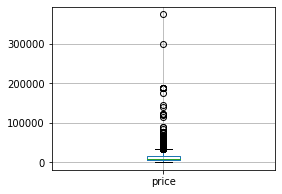

In [148]:
#Precio

estudio_variable('price')

count    51223.000000
mean         9.564297
std          6.205952
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age_publication, dtype: float64

Límite inferior: -7.0, límite superior: 25.0


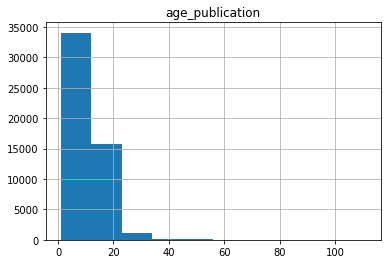

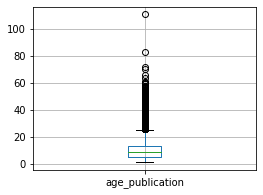

In [149]:
#Años del vehículo cuando el anuncio se publicó

estudio_variable('age_publication')

count     51223.000000
mean      14550.800122
std        8761.116639
min           0.000000
25%        9857.142857
50%       13312.454545
75%       17681.425000
max      373200.000000
Name: odometer_mean, dtype: float64

Límite inferior: -1879.2803571428576, límite superior: 29417.848214285714


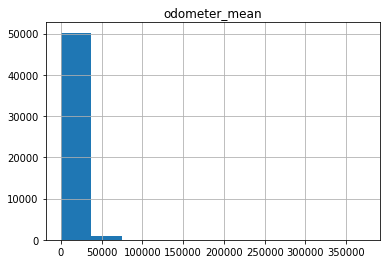

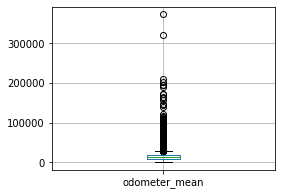

In [150]:
#Millaje

estudio_variable('odometer_mean')

count    51223.000000
mean         6.069500
std          1.742673
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Límite inferior: -2.0, límite superior: 14.0


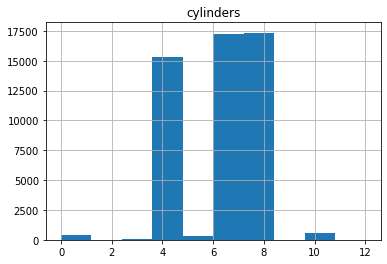

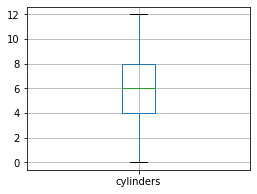

In [151]:
#Número de cilindros

estudio_variable('cylinders')

count    51223.000000
mean         2.636120
std          0.708674
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Límite inferior: 0.5, límite superior: 4.5


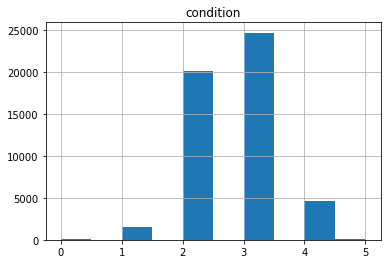

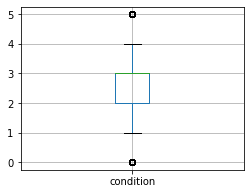

In [152]:
#Estado

estudio_variable('condition')

## Estudiar y tratar valores atípicos

Habiendo obtenido los límites de los valores atípicos en la sección anterior, y analizando un pooco más las variables, podemos determinar que la base de datos se vería beneficiada por la exclusión de valores extraños y atípicos. Extraños como lo son las métricas de 0 cilindros o vehículos de menos de 1000 dólares. Y atípicos pero no de todas las columnas. Por ejemplo, el estado es una variable cualitativa y no cuantitativa aunque se esté representando por números, por lo que no deben eliminarse los atípicos; lo mismo sucedería con los cilíndros, pero estos además no cuentan con valores atípicos.

In [153]:
#Comencemos por eliminar los valores extraños

data_clean = data.query('price > 1000 and cylinders > 0')

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49266 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              49266 non-null  int64         
 1   model_year         49266 non-null  int64         
 2   model              49266 non-null  object        
 3   condition          49266 non-null  int64         
 4   cylinders          49266 non-null  int64         
 5   fuel               49266 non-null  object        
 6   odometer           49266 non-null  int64         
 7   transmission       49266 non-null  object        
 8   type               49266 non-null  object        
 9   paint_color        49266 non-null  object        
 10  is_4wd             49266 non-null  bool          
 11  date_posted        49266 non-null  datetime64[ns]
 12  days_listed        49266 non-null  int64         
 13  group_price        49266 non-null  object        
 14  group_

In [154]:
#Posteriormente eliminemos valores atípicos superiores de variables cuantitativas, 
#los inferiores son despreciables al dar límites negativos.

data_clean2 = data_clean

columns = ['price', 'odometer_mean', 'age_publication']
for col in columns:
    data_clean2 = data_clean2[data_clean2[col] <= (data_clean[col].describe()['75%']+1.5*(data_clean[col].describe()['75%']-data_clean[col].describe()['25%']))]
data_clean.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,group_price,group_price2,year_publication,month_publication,day_publication,age_publication,odometer_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,9000 - 9500,9000 - 10000,2018,6,23,8,18125.000000
1,25500,2014,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,25500 - 26000,25000 - 26000,2018,10,19,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,5500 - 6000,5000 - 6000,2019,2,7,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,189000,automatic,pickup,unknown,False,2019-03-22,9,1500 - 2000,1000 - 2000,2019,3,22,17,11117.647059
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14500 - 15000,14000 - 15000,2019,4,2,3,26967.666667
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,14500 - 15000,14000 - 15000,2018,6,20,5,11590.800000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,12500 - 13000,12000 - 13000,2018,12,27,4,19803.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,15500 - 16000,15000 - 16000,2019,1,7,7,15639.000000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,11500 - 12000,11000 - 12000,2018,7,16,7,14882.000000
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,9000 - 9500,9000 - 10000,2019,2,15,12,12265.916667


In [155]:
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44928 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              44928 non-null  int64         
 1   model_year         44928 non-null  int64         
 2   model              44928 non-null  object        
 3   condition          44928 non-null  int64         
 4   cylinders          44928 non-null  int64         
 5   fuel               44928 non-null  object        
 6   odometer           44928 non-null  int64         
 7   transmission       44928 non-null  object        
 8   type               44928 non-null  object        
 9   paint_color        44928 non-null  object        
 10  is_4wd             44928 non-null  bool          
 11  date_posted        44928 non-null  datetime64[ns]
 12  days_listed        44928 non-null  int64         
 13  group_price        44928 non-null  object        
 14  group_

De esta forma terminamos obteniendo el dataframe con el que se realizarán los análisis. Ya sin valores extraños o atípicos.

## Estudiar parámetros principales sin valores atípicos

Ahora obtendremos los histogramas previamente obtenidos, pero con los valores más limpios.

price
count    44928.000000
mean     11240.817174
std       7581.998833
min       1095.000000
25%       5200.000000
50%       8995.000000
75%      15795.000000
max      34200.000000
Name: price, dtype: float64

age_publication
count    44928.000000
mean         9.712585
std          5.086221
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         25.000000
Name: age_publication, dtype: float64

odometer_mean
count    44928.000000
mean     13448.501294
std       5508.729829
min          0.000000
25%       9859.200000
50%      13000.000000
75%      16711.958333
max      29375.000000
Name: odometer_mean, dtype: float64

cylinders
count    44928.000000
mean         6.043826
std          1.626967
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

condition
count    44928.000000
mean         2.620726
std          0.691924
min          0.000000
25%          2

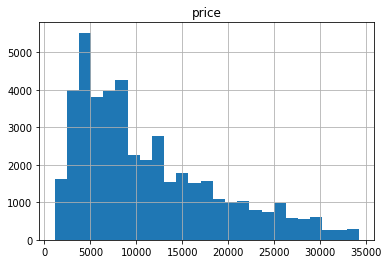

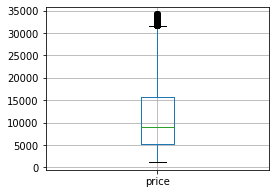

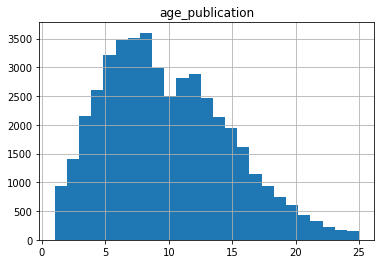

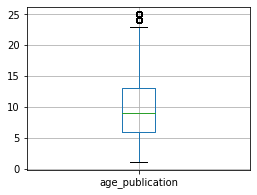

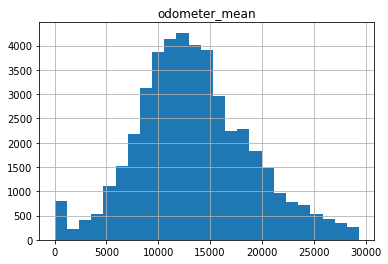

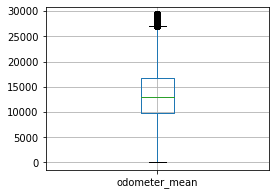

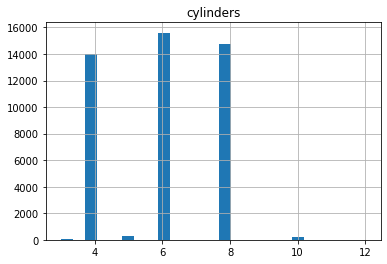

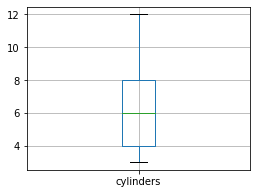

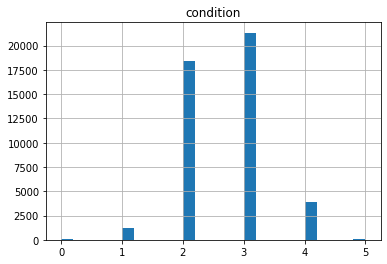

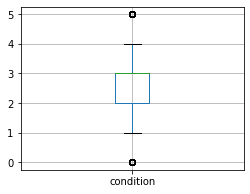

In [156]:
def estudio_variable_limpia(column):
    print(str(column))
    data_clean2.hist(column, bins=25)
    plt.figure(figsize=(4,3))
    data_clean2.boxplot(column)
    print(data_clean2[column].describe())
    print()
    
estudio_variable_limpia('price')
estudio_variable_limpia('age_publication')
estudio_variable_limpia('odometer_mean')
estudio_variable_limpia('cylinders')
estudio_variable_limpia('condition')

Podemos observar unas formas mucho más lógicas de los histogramas, que los primeros obtenidos. Es relevante mencionar que en los diagramas de caja y bigotes siguen apareciendo valores atípicos, pero esto se debe al cambio en la base de datos tras la eliminación de los valores atípicos previos.

Gracias a los histogramas, además de darnos cuenta de que nuestra información ya está limpia, podemos observar que existe claramente un rango de precios más común en el mercado y que sus excepciones son bastante altas, que los usuarios prefieren vender sus autos ántes de los 10 años de edad y que el millaje medio más común al momento de venta es entre los 10000 y 15000. Igualmente observamos que los autos con 4, 6 y 8 cilindros son los más comunes, y que los usuarios suelen vender sus carros en un estado bueno o excelente.

## Periodo de colocación de los anuncios

A continuación estudiaremos las características generales de la duración de los anuncios y buscaremos que relación puede tener su duración con otros parámetros. Esto lo haremos a través del método describe y a través de diagramas de dispersión.

In [157]:
data_clean2['days_listed'].describe()

count    44928.000000
mean        39.590256
std         28.269481
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Observamos que aunque hay anuncios que duran sólo un día y otros hasta 271, en general se presenta un rango común cerrado entre los 19 y 53 días, con una media alrrededor de los 39 y una mediana en 33. Sería útil conocer el estado de conclusión de los anuncios como éxitoso o no exitoso, con ello sabríamos si los que estuvieron 0 días fueron usuarios muy afortunados o que simplemente se arrepintieron, así como si el que duró mucho simplemente se le olvidó quitarlo o porqué lo terminó quitando.

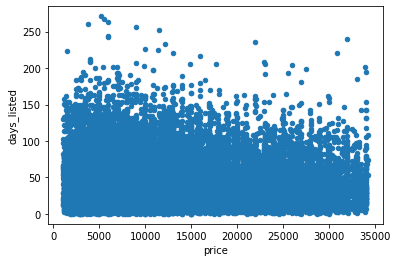

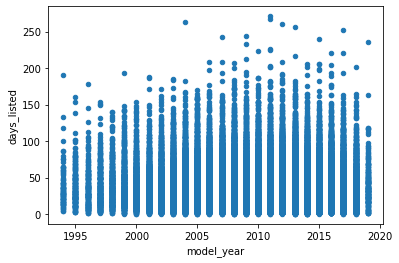

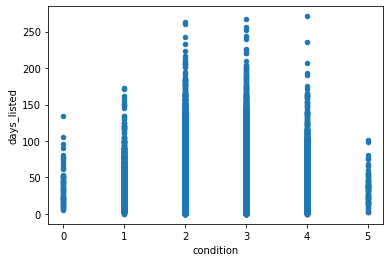

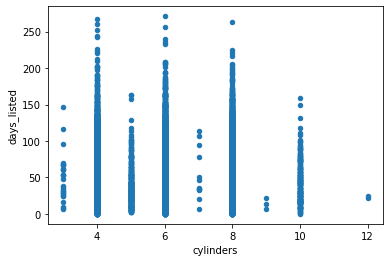

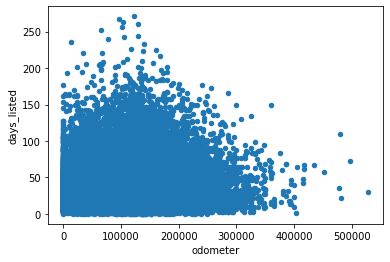

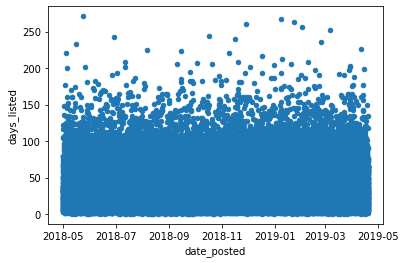

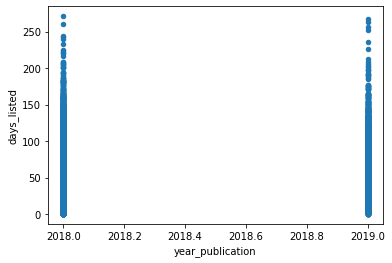

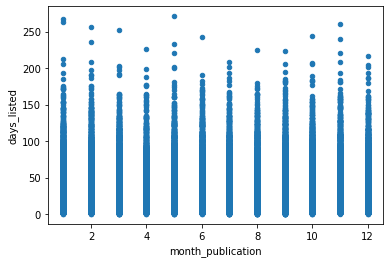

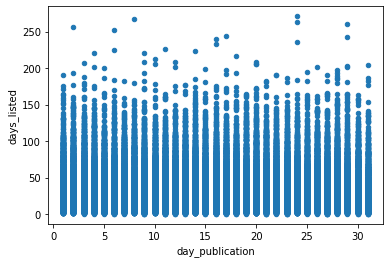

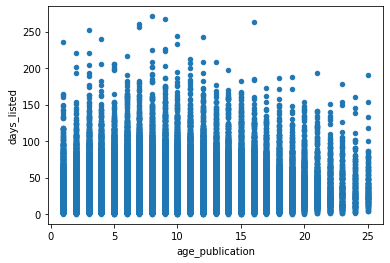

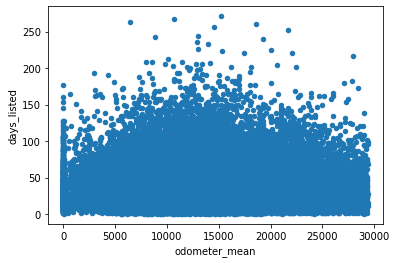

In [158]:
data_clean4=data_clean2[['price','model_year','model','condition','cylinders','fuel','odometer','transmission','type','paint_color','is_4wd','date_posted','days_listed','year_publication','month_publication', 'day_publication', 'age_publication','odometer_mean']]

columns_ploted = ['price','model_year','condition','cylinders','odometer','date_posted','year_publication','month_publication','day_publication','age_publication','odometer_mean']

for col in columns_ploted:
    data_clean4.plot(y='days_listed', x=col, kind='scatter')


Gracias a los diagramas podemos observar distintas tendencias respecto a los días de la publicación, así como variables prácticamente independientes. 

Podemos encontrarque existe una notable relación entre el precio y los días de publicación, ya que entre más caro es el auto más rápidamente se retira su anuncio. Nuevamente sería útil conocer el éxito del anuncio, ya que es posible que quiten uno y vuelvan a anunciarlo a un menor precio. Igualmente esto puede estar directamente relacionado con las condiciones del carro.

Igualmente notamos una tendencia positiva entre los días listados y el año del modelo, sin embargo esta tendencia se encuentra directamente relacionada con la tendencia negativa de la edad del auto. Al final lo que ambas comunican es que los autos más nuevos tienen más duración en sus anuncios.

En cuanto a la condición del carro, los que más rapidamente se venden son los nuevos, y los que son para rescate, lo cual es rasonable considerando que los usuarios prefieren modelos nuevos y pocos problemas o la restauración y precios bajos. Por el otro lado los que se encuentran en condiciones medias, que además son la mayoria de los que se anuncian, toman más tiempo en quitar el anuncio.

En cuestión de cilindros, kilometraje, fecha, año, mes y día de posteo, la relación es prácticamente nula, viendose afectada más que nada por la distribución normal de estas cifras en cuanto a su cantidad.

Y la media de kilometraje sí muestra una tendencia general negativa, lo cual extraña considerando sólo el kilometraje que no parece tener relación, pero es porque se liga directamente con la condición del auto por el desgaste que se le da. Es importante identificar que existe una tendencia positiva al principio de la gráfica, lo cual evidencia esta relación. Los autos en condición de nuevos realmente han recorrido muy poco millaje, y los que se encuentran en condiciones de rescate pudieron haber estado aparcados demasiado tiempo reduciendo su media; mientras que igualmente los más gastados puede ser porque han sido utilizados de manera exhaustiva tendiendo a los altos millajes. 

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

             count          mean
             price         price
type                            
sedan        11031   7048.905448
SUV          11017  10515.913134
truck        10265  15075.726449
pickup        6031  14657.611507
coupe         1898  14058.526870
wagon         1439   8952.453787
mini-van      1051   7802.803045
hatchback      933   6944.068596
van            514   8832.241245
convertible    331  13127.009063
other          218  10018.201835
offroad        179  14321.156425
bus             21  18441.047619


<AxesSubplot:>

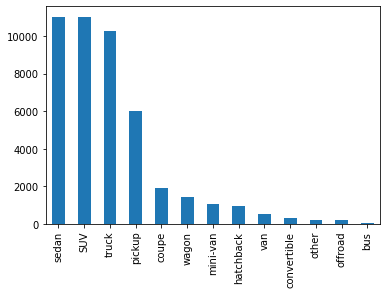

In [159]:
print(data_clean4.pivot_table(index='type',values='price',aggfunc=['count','mean']).sort_values(by=('count','price'), ascending=False))
data_clean4['type'].value_counts().plot(kind='bar')

Podemos observar que claramente las dos tipos de vehículo con más anuncios son SUV y sedán, seguidos inmediatamente y por poca cantidad por las "truck".

## Factores de precio

Considerando los dos tipos de vehículos con más anuncios procederemos a un análisis respecto a las correlaciones que existen con los precios. Consideraremos las variables de edad, millaje, condición, tipo de transmisión y color; para esto crearemos una partición de estos datos. En el caso del tipo de transmisión y el color lo veremos a través de diagramas de caja, mientras que para el resto usaremos diagramas y matrices de correlación.

Es importante destacar que para las variables categóricas sólo se considerarán grupos con al menos 50 anuncios, de lo contrario se considerarán valores inválidos.

In [161]:
#Creación de la partición de datos

data_clean_price_relation = data_clean4[['price','type','odometer_mean','paint_color', 'transmission', 'age_publication', 'condition']]
data_clean_price_relation_sedan = data_clean_price_relation.query('type == "sedan"')
data_clean_price_relation_SUV = data_clean_price_relation.query('type == "SUV"')
data_clean_price_relation_sedan.info()
print()
data_clean_price_relation_SUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11031 entries, 2 to 51524
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            11031 non-null  int64  
 1   type             11031 non-null  object 
 2   odometer_mean    11031 non-null  float64
 3   paint_color      11031 non-null  object 
 4   transmission     11031 non-null  object 
 5   age_publication  11031 non-null  int64  
 6   condition        11031 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 689.4+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 51516
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            11017 non-null  int64  
 1   type             11017 non-null  object 
 2   odometer_mean    11017 non-null  float64
 3   paint_color      11017 non-null  object 
 4   transmission     11017 n

Comencemos por el amálisis de los sedan:

               type
transmission       
automatic     10438
manual          524
other            69


<AxesSubplot:xlabel='transmission', ylabel='price'>

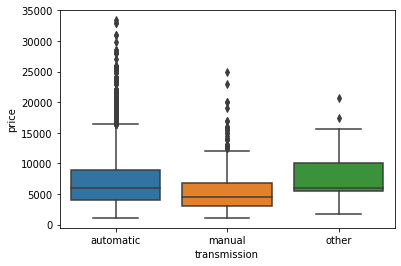

In [162]:
print(data_clean_price_relation_sedan.pivot_table(index='transmission', values='type', aggfunc='count'))

sns.boxplot(x='transmission', y='price', data=data_clean_price_relation_sedan)

             type
paint_color      
black        1606
blue         1139
brown         249
custom        249
green         194
grey         1495
orange          9
purple         23
red           860
silver       1871
unknown      1966
white        1350
yellow         20


<AxesSubplot:xlabel='paint_color', ylabel='price'>

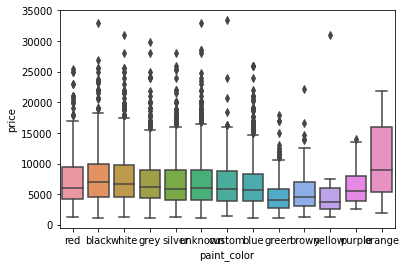

In [163]:
print(data_clean_price_relation_sedan.pivot_table(index='paint_color', values='type', aggfunc='count'))

sns.boxplot(x='paint_color', y='price', data=data_clean_price_relation_sedan)

Podemos observar que los precios más comunes son muy similares entre los distintos tipos de transmisión, aunque sí hay una  elevación en los precios para "otro" tipo de transmisión en general, pero en sus valores atípicos, los automáticos sí tienen la constante de un precio más elevado.

En cuanto a los colores, es importante descartar el neranja, el morado y el amarillo, dado que son grupos con menos de 50 registros, volviendo estos datos irrelevantes. Los más económicos serían los cafés y verdes, colores un tanto extraños y poco buscados, mientras que los que presentan precios más altos, segurante por su mayor demanda son los blancos y negros.

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='price'>,
        <AxesSubplot:xlabel='age_publication', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer_mean'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='odometer_mean'>,
        <AxesSubplot:xlabel='age_publication', ylabel='odometer_mean'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer_mean'>],
       [<AxesSubplot:xlabel='price', ylabel='age_publication'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='age_publication'>,
        <AxesSubplot:xlabel='age_publication', ylabel='age_publication'>,
        <AxesSubplot:xlabel='condition', ylabel='age_publication'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='condition'>,
        <AxesSubplot:xlabel='age_publication', ylabel='condition'>,
        <AxesSubplo

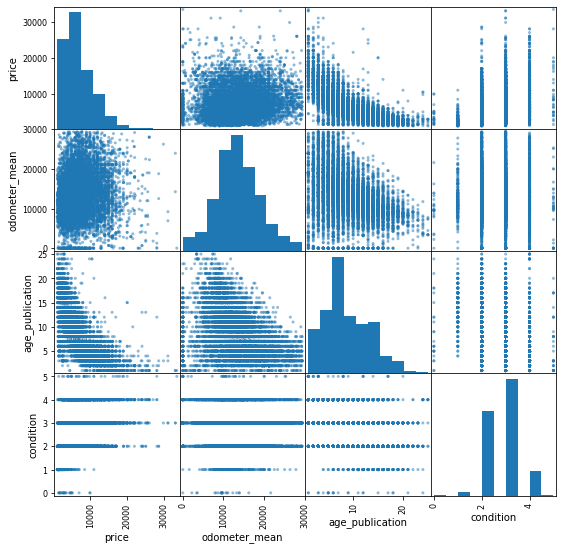

In [164]:
pd.plotting.scatter_matrix(data_clean_price_relation_sedan, figsize=(9, 9))

In [165]:
data_clean_price_relation_sedan.corr()

,price,odometer_mean,age_publication,condition
price,1.000000,0.133569,-0.704500,0.316762
odometer_mean,0.133569,1.000000,-0.423762,-0.028916
age_publication,-0.704500,-0.423762,1.000000,-0.278231
condition,0.316762,-0.028916,-0.278231,1.000000


Encontramos una importante relación negativa entre el precio y la edad de auto publicado, lo cual es bastante lógico ya que entre más años tenga un auto su valor se deprecia. Sin embargo, encontramos poca relación, y con una tendencia al alza en los valores medios para la condición del auto, lo cual podría parecer extraño, pero cobra sentido al observar el histograma de condición que tiene prácticamente la misma distribución, lo cual podría indicar que en condiciones medias se venden carros de gamas muy distintas, algunas llegando a precios bastante altos. Mientrasque la relación es prácticamente nula con el millaje promedio, evidenciando que no es un dato muy relevante para los compradores.

Ahora procedamos con el mismo estudio, pero con la información referente a las SUV:

               type
transmission       
automatic     10482
manual          447
other            88


<AxesSubplot:xlabel='transmission', ylabel='price'>

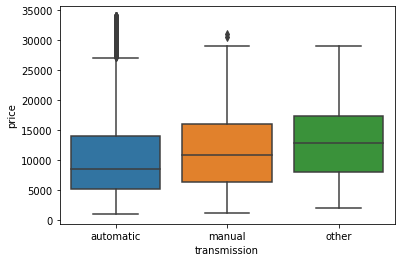

In [166]:
print(data_clean_price_relation_SUV.pivot_table(index='transmission', values='type', aggfunc='count'))

sns.boxplot(x='transmission', y='price', data=data_clean_price_relation_SUV)

             type
paint_color      
black        1930
blue          925
brown         341
custom        265
green         402
grey         1053
orange         74
purple         38
red           833
silver       1404
unknown      1984
white        1725
yellow         43


<AxesSubplot:xlabel='paint_color', ylabel='price'>

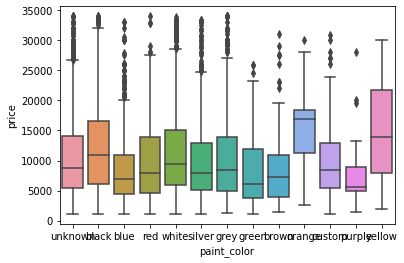

In [167]:
print(data_clean_price_relation_SUV.pivot_table(index='paint_color', values='type', aggfunc='count'))

sns.boxplot(x='paint_color', y='price', data=data_clean_price_relation_SUV)

Esta vez, respecto al precio relacionado con la transmisión, podemos encontrar que existe un escalamiento evidente de precios de automático a manual y a otro; pero manteniendo todavía los precios más altos en los valores atípicos de los automáticos.

En cuanto a los colores, nuevamente descartaremos el naranja, el morado y el amarillo, dado que son grupos con menos de 50 registros, volviendo estos datos irrelevantes. Entre los más económicos permanecen los cafés y verdes, colores un tanto extraños, pero se les agrega el azul, mientras que los que presentan precios más altos, también son los blancos y negros, así como en los sedan.

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='price'>,
        <AxesSubplot:xlabel='age_publication', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer_mean'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='odometer_mean'>,
        <AxesSubplot:xlabel='age_publication', ylabel='odometer_mean'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer_mean'>],
       [<AxesSubplot:xlabel='price', ylabel='age_publication'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='age_publication'>,
        <AxesSubplot:xlabel='age_publication', ylabel='age_publication'>,
        <AxesSubplot:xlabel='condition', ylabel='age_publication'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer_mean', ylabel='condition'>,
        <AxesSubplot:xlabel='age_publication', ylabel='condition'>,
        <AxesSubplo

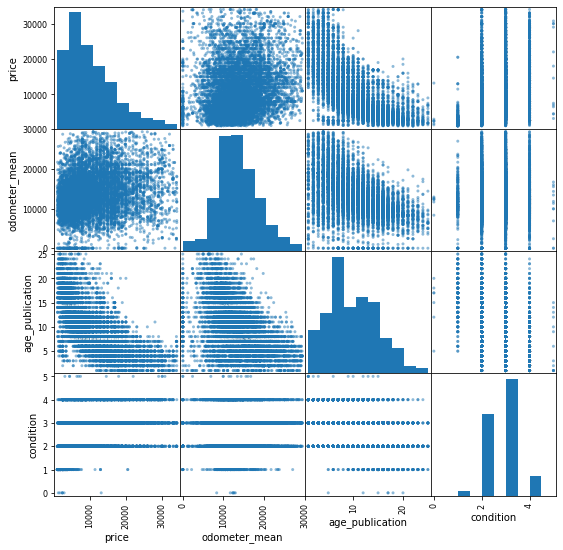

In [168]:
pd.plotting.scatter_matrix(data_clean_price_relation_SUV, figsize=(9, 9))

In [169]:
data_clean_price_relation_SUV.corr()

,price,odometer_mean,age_publication,condition
price,1.000000,0.218106,-0.682444,0.294346
odometer_mean,0.218106,1.000000,-0.515737,0.021648
age_publication,-0.682444,-0.515737,1.000000,-0.311470
condition,0.294346,0.021648,-0.311470,1.000000


Nuevamente encontramos una importante relación negativa entre el precio y la edad de auto publicado. Pero esta vez, a diferencia de lo que sucedía con los sedan la relación con el millaje medio y la condición es bastante baja con una tendencia positiva; esto es una evidencia de que el mercado se los sedan y el de las SUV se manejan algo distinto. Esta ligera tendencia al alsa evidencia que los usuarios de SUV conservan por más tiempo el vehículo, lo cual puede deberse a su precio en general más elevado.

## Conclusión general

La información en general tenía algunos problemas, especialmente de valores ausentes, errores de captura y valores atípicos. Entre los ausentes destacaron varios que pudimos terminar infiriendo basándonos en columnas ya pobladas y generando columnas con valores agrupados para los precios; estos casos fueron por ejemplo los cilindros, el año del modelo y la media de millaje. En el caso de errores de captura destacaron problemas de vehículos por precios exesivamente bajos, los cuales se detectaron ya en un análisis más avanzado. Y en valores atípicos fue importante no simplemente descartar modelos de gamas altas, sino considerar los valores atípicos considerando el modelo, año y condiciones de los autos.

Podemos concluir que en cuestiones de precio, este se ve principalmente afectado por el año del modelo, ya sea directamente o considerando la edad del mismo, así como su desgaste y su color. Algunos aspectos como el tipo de transmisión no tienen tanto impacto en el mercado general. Sin embargo es importante considerar que el precio de un auto no lo es todo, ya que para que un anuncio aparentemente tenga éxito